In [35]:
import sys
import os
import shutil
import datetime
import re
import pandas as pd
from collections import Counter
#sys.path.append(os.path.abspath("/home/jose/Dropbox/Doktorarbeit/"))
#from reading_robot import load_data, tei2text, text2features, classify, process_labels, describe_data,feature_analysis, cull_data, st_tests, metadata2numbers, cluster, call_stylo, prepare_subcorpus
import scipy.stats as stats
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
%matplotlib inline
from shutil import copyfile
import numpy as np
import glob

In [36]:
def make_summary(df, name_corpus="16-17-teatro", author_column_name = "author.name", tokens_column_name = 'am.tokens'):
    number_texts = df.shape[0]
    number_authors = len(df[author_column_name].unique())
    mean_number_text_author = df[author_column_name].value_counts().mean()
    std_number_text_author = df[author_column_name].value_counts().std()
    mean_length_text = df[tokens_column_name].mean()
    std_length_text = df[tokens_column_name].std()
    distribution_authors_texts = df[author_column_name].value_counts()

    summary_corpus_df = pd.DataFrame(
                [number_texts,   number_authors,  mean_number_text_author,   std_number_text_author,  mean_length_text, std_length_text, distribution_authors_texts  ],
        index=["number_texts","number_authors","mean_number_text_author", "std_number_text_author","mean_length","std_length", "distribution_authors_texts"  ],
        columns = [name_corpus]).T
    return summary_corpus_df

# Read Data

In [37]:
sdo_teatro_df = pd.read_csv("./../data/teatro-sgo/summary.tsv", sep="\t",index_col=0)

In [38]:
sdo_teatro_df

,number_texts,number_authors,mean_number_text_author,std_number_text_author,mean_length,std_length,distribution_authors_texts
16-17-teatro,38,10,3.8,1.619328,13011.578947,4041.92692,Lope 6\nCalderon 6\nTirso ...


In [39]:
sdo_poesia_df = pd.read_csv("./../data/corpus_Poesia_SiglodeOro/summary.tsv", sep="\t",index_col=0)
sdo_poesia_df

,number_texts,number_authors,mean_number_text_author,std_number_text_author,mean_length,std_length,distribution_authors_texts
16-17-poesia,82,41,2.0,0.0,4818.853659,6630.088328,LuisCarrilloySotomayor 2\nJosephdeLitalayC...


In [40]:

sdo_prosa_df = pd.read_csv("./../data/prosa-SdO/summary.tsv", sep="\t",index_col=0)
sdo_prosa_df


,number_texts,number_authors,mean_number_text_author,std_number_text_author,mean_length,std_length,distribution_authors_texts
16-17-prosa,24,5,4.8,3.420526,65924.916667,75740.645671,Vives-Juan-Luis 9\nMejía 8\nVa...


In [41]:
sdo_prosa_df["distribution_authors_texts"].tolist()

['Vives-Juan-Luis    9\nMejía             8\nValdés-Juan        3\nValdés-Alfonso     2\nHorozco            2\nName: author, dtype: int64']

In [42]:

disco_df = pd.read_csv("./../data/disco/summary.tsv", sep="\t",index_col=0)
disco_df


,number_texts,number_authors,mean_number_text_author,std_number_text_author,mean_length,std_length,distribution_authors_texts
19-20-poesia,64,32,2.0,0.0,1837.71875,689.400187,Ros-de-Olano-Antonio 2\nBaralt-R...


## Cuentos

In [43]:
s19_20_cuentos_metadatos_df = pd.read_csv("./../data/cuentos_espanoles/metadata.csv", index_col=0)
s19_20_cuentos_metadatos_df


,idno,author.name,title,year,supergenre,genre,subgenre.cligs.important,author.country,author.viaf,author.bne,...,am.verses,am.sps,am.pds,am.numbers,am.puncts,am.blocks,am.chapters,am.shortStories,am.fts,decade
ce0005,ce0005,Bazan,CuAmor,1898,narrative,colección-cuentos,NaN,Spain,51699645,NaN,...,4,0,259,68,12934,848,0,43,0,1890
ce0007,ce0007,Bazan,CuTierra,1922,narrative,colección-cuentos,NaN,Spain,51699645,NaN,...,6,0,470,67,14391,1190,0,43,0,1920
ce0009,ce0009,Bazan,CuMarineda,1892,narrative,colección-cuentos,NaN,Spain,51699645,NaN,...,0,0,183,23,8480,501,0,9,0,1890
ce0017,ce0017,Bazan,interiores,1907,narrative,colección-cuentos,NaN,Spain,51699645,NaN,...,0,75,186,53,7669,673,0,21,0,1900
ce0018,ce0018,BlascoIbanez,Luna_c,1909,narrative,colección-cuentos,NaN,Spain,73848096,NaN,...,0,0,53,0,4030,363,0,11,0,1900
ce0019,ce0019,BlascoIbanez,Flor,1895,narrative,colección-cuentos,realist,Spain,73848096,NaN,...,4,0,39,0,2227,372,7,4,0,1890
ce0020,ce0020,Clarin,Pipa,1886,narrative,colección-cuentos,NaN,Spain,17218138,NaN,...,42,0,636,22,15907,1537,25,9,0,1880
ce0021,ce0021,Clarin,Senor,1893,narrative,colección-cuentos,NaN,Spain,17218138,NaN,...,1,0,330,14,10847,859,18,13,1,1890
ce0022,ce0022,Clarin,Morales,1896,narrative,colección-cuentos,NaN,Spain,17218138,NaN,...,49,28,240,60,17884,1390,22,28,0,1890
ce0023,ce0023,Clarin,Berta,1892,narrative,colección-cuentos,NaN,Spain,17218138,NaN,...,15,0,181,7,9671,544,32,3,0,1890


In [44]:

s19_20_cuentos_metadatos_df = s19_20_cuentos_metadatos_df.loc[~s19_20_cuentos_metadatos_df["author.name"].isin(["Galdos","Pereda","Unamuno"])]

In [45]:
s19_20_cuentos_summary_df = make_summary(s19_20_cuentos_metadatos_df, name_corpus="19-20-cuent-esp")
s19_20_cuentos_summary_df

,number_texts,number_authors,mean_number_text_author,std_number_text_author,mean_length,std_length,distribution_authors_texts
19-20-cuent-esp,17,5,3.4,0.894427,40822.2,22187.6,Clarin 4 Miro 4 Bazan ...


## Novelas espanholas

In [46]:
s19_20_novelas_metadatos_df = pd.read_csv("./../data/novelas-espanolas/metadata.csv", index_col=0)
s19_20_novelas_metadatos_df


,idno,author.name,title,year,supergenre,genre,subgenre,author.country,author.viaf,author.bne,...,am.punctuations,am.pronouns,am.dates,am.numbers.1,am.interjections,am.ne.persons,am.ne.organizations,am.ne.locations,am.ne.others,decade
ne0002,ne0002,Galdos,Misericordia,1889,narrative,novela,realist,Spain,71395987,XX1014802,...,17170,9823,47,n.av.,211,1772,389,587,143,1880
ne0005,ne0005,Galdos,Tristana,1892,narrative,novela,bildungsroman,Spain,71395987,XX1014802,...,10344,6194,26,n.av.,149,788,86,229,76,1890
ne0014,ne0014,Valle,SonataEstio,1903,narrative,novela,erotic,Spain,68936773,XX1055436,...,4119,1858,5,n.av.,53,192,175,102,35,1900
ne0017,ne0017,Valle,FlordeSantidad,1904,narrative,novela,erotic,Spain,68936773,XX1055436,...,3927,1314,3,n.av.,46,167,164,66,26,1900
ne0019,ne0019,BlascoIbanez,Bodega,1905,narrative,novela,realist,Spain,73848096,XX1028057,...,16990,8468,43,n.av.,144,1731,342,639,103,1900
ne0027,ne0027,Galdos,Bringas,1884,narrative,novela,realist,Spain,71395987,XX1014802,...,12746,7292,83,n.av.,146,1347,333,497,121,1880
ne0030,ne0030,Valle,TiranoBanderas,1926,narrative,novela,historical,Spain,68936773,XX1055436,...,11314,3561,7,n.av.,39,1181,618,230,132,1920
ne0041,ne0041,Miro,Hilvan,1903,narrative,novela,realist,Spain,29542991,XX1720928,...,6969,2778,4,n.av.,68,584,101,163,79,1900
ne0042,ne0042,Miro,Vivir,1904,narrative,novela,autobiographical,Spain,29542991,XX1720928,...,5283,1959,4,n.av.,46,326,23,55,8,1900
ne0044,ne0044,Miro,Amigo,1908,narrative,novela,bildungsroman,Spain,29542991,XX1720928,...,4695,2188,9,n.av.,48,139,27,39,11,1900


In [47]:
s19_20_novelas_summary_df = make_summary(s19_20_novelas_metadatos_df, name_corpus="19-20-nov-esp")
s19_20_novelas_summary_df

,number_texts,number_authors,mean_number_text_author,std_number_text_author,mean_length,std_length,distribution_authors_texts
19-20-nov-esp,39,13,3,0,64642.7,35161.2,Valera 3 Bazan 3 Unamuno ...


## Novelas hispanoamericanas

In [48]:

s19_20_novelas_hispano_metadatos_df = pd.read_csv("./../data/novelas-hispanoamericanas/metadata.csv", index_col=0)
s19_20_novelas_hispano_metadatos_df



,idno,author-name,author-gender,title,year,supergenre,genre,genre-subtitle,availability,subgenre,narrative-perspective,form,decade,words
nh0081,nh0081,Bunge,male,Sangre,1903,narrative,novel,n.av.,free,historical,heterodiegetic,prose,1900,79415
nh0111,nh0111,Bunge,male,Grande,1907,narrative,short novel,n.av.,free,historical,heterodiegetic,prose,1900,8374
nh0082,nh0082,Bunge,male,Perez,1907,narrative,short novel,n.av.,free,sentimental,heterodiegetic,prose,1900,12927
nh0011,nh0011,Cambaceres,male,Rumbo,1885,narrative,novel,n.av.,free,naturalistic,heterodiegetic,prose,1880,33586
nh0012,nh0012,Cambaceres,male,Sangre,1887,narrative,novel,n.av.,free,naturalistic,heterodiegetic,prose,1880,40831
nh0034,nh0034,Cambaceres,male,Musica,1884,narrative,novel,silbidos de un vago,free,naturalistic,homodiegetic,prose,1880,40786
nh0129,nh0129,Cuellar,male,Fuerenos,1883,narrative,short novel,n.av.,free,costumbrista,heterodiegetic,prose,1880,25050
nh0131,nh0131,Cuellar,male,BaileCochino,1886,narrative,novel,n.av.,free,costumbrista,heterodiegetic,prose,1880,35039
nh0130,nh0130,Cuellar,male,NocheBuena,1890,narrative,short novel,Negativas tomadas del 24 al 25 de diciembre de...,free,costumbrista,heterodiegetic,prose,1890,11668
nh0021,nh0021,Frias,male,Miserias,1916,narrative,novel,Novela,free,autobiographical,heterodiegetic,prose,1910,23922


In [49]:
s19_20_novelas_hispano_summary_df = make_summary(s19_20_novelas_hispano_metadatos_df, name_corpus="19-20-nov-hisp", author_column_name = "author-name", tokens_column_name = 'words')
s19_20_novelas_hispano_summary_df

,number_texts,number_authors,mean_number_text_author,std_number_text_author,mean_length,std_length,distribution_authors_texts
19-20-nov-hisp,24,8,3,0,47010.9,35543.8,Holmberg 3 Cambaceres 3 Cuellar ...


# Combine tables

In [50]:
summary_combined_df = pd.concat([s19_20_novelas_hispano_summary_df, s19_20_novelas_summary_df,s19_20_cuentos_summary_df,
sdo_prosa_df,
sdo_poesia_df,
disco_df,
sdo_teatro_df]).sort_index().round(2)

In [51]:
summary_combined_df

,number_texts,number_authors,mean_number_text_author,std_number_text_author,mean_length,std_length,distribution_authors_texts
16-17-poesia,82,41,2,0,4818.85,6630.09,LuisCarrilloySotomayor 2\nJosephdeLitalayC...
16-17-prosa,24,5,4.8,3.42053,65924.9,75740.6,Vives-Juan-Luis 9\nMejía 8\nVa...
16-17-teatro,38,10,3.8,1.61933,13011.6,4041.93,Lope 6\nCalderon 6\nTirso ...
19-20-cuent-esp,17,5,3.4,0.894427,40822.2,22187.6,Clarin 4 Miro 4 Bazan ...
19-20-nov-esp,39,13,3,0,64642.7,35161.2,Valera 3 Bazan 3 Unamuno ...
19-20-nov-hisp,24,8,3,0,47010.9,35543.8,Holmberg 3 Cambaceres 3 Cuellar ...
19-20-poesia,64,32,2,0,1837.72,689.4,Ros-de-Olano-Antonio 2\nBaralt-R...


In [52]:
summary_combined_df.to_csv("./../data/summaries.tsv",sep="\t")

In [53]:
summary_combined_df = pd.read_csv("./../data/summaries.tsv",sep="\t", index_col=0).round(2)

In [54]:
print(summary_combined_df.loc["19-20-cuent-esp","distribution_authors_texts"])


Clarin          4
Miro            4
Bazan           4
Valle           3
BlascoIbanez    2
Name: author.name, dtype: int64


In [55]:
summary_combined_df

,number_texts,number_authors,mean_number_text_author,std_number_text_author,mean_length,std_length,distribution_authors_texts
16-17-poesia,82,41,2.0,0.00,4818.85,6630.09,LuisCarrilloySotomayor 2\nJosephdeLitalayC...
16-17-prosa,24,5,4.8,3.42,65924.92,75740.65,Vives-Juan-Luis 9\nMejía 8\nVa...
16-17-teatro,38,10,3.8,1.62,13011.58,4041.93,Lope 6\nCalderon 6\nTirso ...
19-20-cuent-esp,17,5,3.4,0.89,40822.24,22187.59,Clarin 4\nMiro 4\nBazan ...
19-20-nov-esp,39,13,3.0,0.00,64642.72,35161.19,Valera 3\nBazan 3\nUnamuno ...
19-20-nov-hisp,24,8,3.0,0.00,47010.88,35543.78,Holmberg 3\nCambaceres 3\nCuellar ...
19-20-poesia,64,32,2.0,0.00,1837.72,689.40,Ros-de-Olano-Antonio 2\nBaralt-R...


In [56]:
summary_combined_df.loc["19-20-nov-esp"]

number_texts                                                                 39
number_authors                                                               13
mean_number_text_author                                                       3
std_number_text_author                                                        0
mean_length                                                             64642.7
std_length                                                              35161.2
distribution_authors_texts    Valera          3\nBazan           3\nUnamuno ...
Name: 19-20-nov-esp, dtype: object

In [57]:
summary_combined_df.loc["19-20-nov-esp","distribution_authors_texts"]

'Valera          3\nBazan           3\nUnamuno         3\nGaldos          3\nClarin          3\nValle           3\nTrigo           3\nPereda          3\nLanza           3\nAlarcon         3\nMiro            3\nPicon           3\nBlascoIbanez    3\nName: author.name, dtype: int64'

In [58]:

", ".join(sorted(re.sub(r"[\s\d]+", r",",summary_combined_df.loc["19-20-nov-esp","distribution_authors_texts"]).split(",")))


', , Alarcon, Bazan, BlascoIbanez, Clarin, Galdos, Lanza, Miro, Name:, Pereda, Picon, Trigo, Unamuno, Valera, Valle, author.name, dtype:, int'

In [59]:
summary_combined_df

,number_texts,number_authors,mean_number_text_author,std_number_text_author,mean_length,std_length,distribution_authors_texts
16-17-poesia,82,41,2.0,0.00,4818.85,6630.09,LuisCarrilloySotomayor 2\nJosephdeLitalayC...
16-17-prosa,24,5,4.8,3.42,65924.92,75740.65,Vives-Juan-Luis 9\nMejía 8\nVa...
16-17-teatro,38,10,3.8,1.62,13011.58,4041.93,Lope 6\nCalderon 6\nTirso ...
19-20-cuent-esp,17,5,3.4,0.89,40822.24,22187.59,Clarin 4\nMiro 4\nBazan ...
19-20-nov-esp,39,13,3.0,0.00,64642.72,35161.19,Valera 3\nBazan 3\nUnamuno ...
19-20-nov-hisp,24,8,3.0,0.00,47010.88,35543.78,Holmberg 3\nCambaceres 3\nCuellar ...
19-20-poesia,64,32,2.0,0.00,1837.72,689.40,Ros-de-Olano-Antonio 2\nBaralt-R...


In [60]:
summary_combined_df.loc["16-17-teatro"]["distribution_authors_texts"]


'Lope             6\nCalderon         6\nTirso            5\nSJ               5\nRojasZorrilla    4\nMoreto           3\nCastro           3\nVélezGuevara    2\nSalazar          2\nSolis            2\nName: author, dtype: int64'

In [61]:
summary_combined_df.loc["19-20-nov-hisp"]

number_texts                                                                 24
number_authors                                                                8
mean_number_text_author                                                       3
std_number_text_author                                                        0
mean_length                                                             47010.9
std_length                                                              35543.8
distribution_authors_texts    Holmberg      3\nCambaceres    3\nCuellar     ...
Name: 19-20-nov-hisp, dtype: object

<AxesSubplot:xlabel='mean_number_text_author', ylabel='mean_length'>

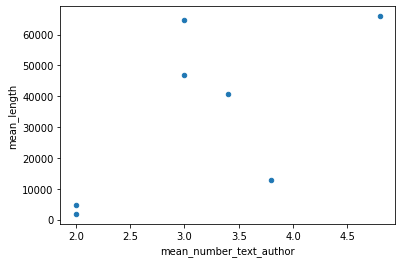

In [62]:
summary_combined_df.plot.scatter("mean_number_text_author","mean_length")

In [63]:
outdir = "./../visualisations/"

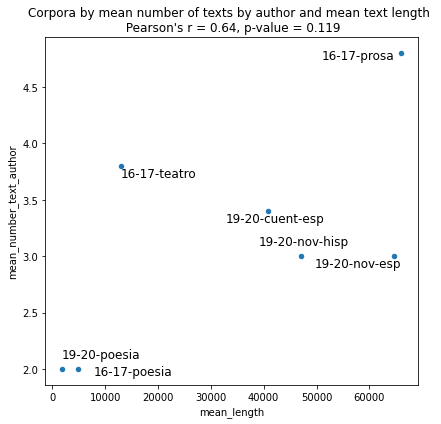

In [65]:

r, p_value = stats.pearsonr(summary_combined_df["mean_number_text_author"], summary_combined_df["mean_length"])

summary_combined_df.plot.scatter( "mean_length", "mean_number_text_author", title="Corpora by mean number of texts by author and mean text length \n Pearson's r = " + str(round(r, 2)) + ", p-value = " + str(round(p_value, 3)), figsize=(6,6))

for index, row  in summary_combined_df.iterrows():
    if index == "16-17-prosa" or index == "19-20-nov-esp":
        horizontal_value = row["mean_length"] - 15000
    elif  index == "19-20-nov-hisp" or index == "19-20-cuent-esp":
        horizontal_value = row["mean_length"] - 8000

    elif  index == "16-17-poesia" :
        horizontal_value = row["mean_length"] + 3000
    else:
        horizontal_value = row["mean_length"]

    """   
    elif index == "16-17-teatro":
        vertical_value = row["results_mean"] +1
    elif index == "16-17-poesia":
        vertical_value = row["results_mean"] +1
    else:
    """ 

    if index == "19-20-nov-esp" or index == "19-20-cuent-esp" or index == "16-17-teatro":
        vertical_value = row["mean_number_text_author"] - 0.1
    
    elif  index == "16-17-poesia" or index == "16-17-prosa":
        vertical_value = row["mean_number_text_author"] - 0.05
        
    else:
        vertical_value = row["mean_number_text_author"] + 0.1

    plt.text(horizontal_value ,vertical_value, index, fontsize=12)

plt.tight_layout()
plt.savefig(outdir + "scatter_number_texts_authors_text_length.png", dpi=300, format="png", facecolor='white', transparent=False)

In [66]:
summary_combined_df

,number_texts,number_authors,mean_number_text_author,std_number_text_author,mean_length,std_length,distribution_authors_texts
16-17-poesia,82,41,2.0,0.00,4818.85,6630.09,LuisCarrilloySotomayor 2\nJosephdeLitalayC...
16-17-prosa,24,5,4.8,3.42,65924.92,75740.65,Vives-Juan-Luis 9\nMejía 8\nVa...
16-17-teatro,38,10,3.8,1.62,13011.58,4041.93,Lope 6\nCalderon 6\nTirso ...
19-20-cuent-esp,17,5,3.4,0.89,40822.24,22187.59,Clarin 4\nMiro 4\nBazan ...
19-20-nov-esp,39,13,3.0,0.00,64642.72,35161.19,Valera 3\nBazan 3\nUnamuno ...
19-20-nov-hisp,24,8,3.0,0.00,47010.88,35543.78,Holmberg 3\nCambaceres 3\nCuellar ...
19-20-poesia,64,32,2.0,0.00,1837.72,689.40,Ros-de-Olano-Antonio 2\nBaralt-R...
